In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Untitled spreadsheet').sheet1
data = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(data[1:], columns=data[0])
df = df.astype({'Input':'float'})
df = df.astype({'output':'float'})

In [ ]:
df.head()

,Input,output
0,1.0,5.0
1,2.0,16.0
2,3.0,32.0
3,4.0,40.0
4,5.0,51.0


In [ ]:
x=df[['Input']].values
y=df[['output']].values
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
Scaler=MinMaxScaler()

In [ ]:
Scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=Scaler.transform(x_train)

In [ ]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)

])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 912ms/step - loss: 1123.0779
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 1121.9802
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 1121.1560
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 1120.4578
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 1119.8302
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 1119.2498
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 1118.7006
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 1118.1759
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 1117.6700
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 1117.1771
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 1116.6942
Epoch 12/2000
1/1 [==============================] - 0s 12ms/step - loss: 1116.2196
E

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

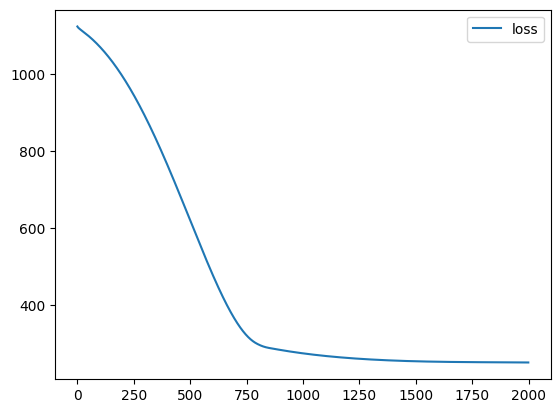

In [ ]:
loss_df.plot()

In [ ]:
x_test1 = Scaler.transform(x_test)

In [ ]:
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 155ms/step - loss: 544.2206


544.2206420898438

In [ ]:
X_n1 = [[30]]

In [ ]:
X_n1_1 = Scaler.transform(X_n1)

In [ ]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 103ms/step


array([[28.510849]], dtype=float32)